## LINEAR REGRESSION USING FIRST PRINCIPLE

### Linear Regression
Linear programming is a mathematical technique for finding optimal solutions to problems that can be expressed using linear equations and inequalities.
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

## Overview

#### Hypothesis (h)
Hypothesis is a significant relationship between an independent variable X and a dependent variable Y.

${x_0}$ is bias value should be 1


   $\begin{align}
    \ {h} = \theta_0*x_0+ \theta_1*x_1 \;\;(For\;single\;variable)
    \end{align}
   $

#### Cost Function (mean squared difference )
$\begin{align}
   \ {J(min)} = (1/(2*m))* \sum_{i=1}^m (h_i - y_i )^2
   \end{align}
    $

#### Gradient Descent
Gradient Descent is a general function for minimizing a parameter, in this case the Mean Squared Error(MSE) cost function.

$\begin{align}
   \ {\theta} = {\theta}-{ \alpha }\frac{\partial j}{\Bigl({\partial \theta}\Bigr)}  
   \end{align}
    $


## Data
Import data to apply linear regression.

In [97]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
# Read the data set
data = pd.read_csv('ex1data1.csv')
data.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [99]:
#loc attribute access paticular cell in the given DataFrame using the index & column labels.
x=np.array(data.iloc[:,0:-1])
y=np.transpose([np.array(data.iloc[:,-1])])
print(np.shape(x))
print(np.shape(y))

(97, 1)
(97, 1)


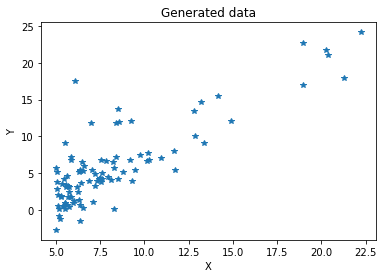

In [100]:
#ploting X and Y Dataset (x should be input dataset and y should output dataset(left side))
plt.figure(1)
plt.title("Generated data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y,'*')
plt.show()

### Training & Testing Dataset

The training data is used to make sure that, the machine recognizes patterns in the given data and the test data is used to see how well the machine can predict new values based on its training.

In [101]:
#split function using randomization 
def split_data(x,y,test_per):
    m=len(x)
    random_data=np.random.randint(0,m,m)
    #Number Of train set & test set 
    num_train_set = int((1-test_per)*m)
    num_test_set  = int(test_per*m)
    train_ind=random_data[0:num_train_set]
    #creating a array of zeros for the train dataset
    x_train=np.zeros((len(train_ind),1))
    y_train=np.zeros((len(train_ind),1))
    # x_train & y_train after the split 
    x_train = x[train_ind]
    y_train = y[train_ind]
    
    num_test_set=random_data[num_train_set::]
    #creating a array of zeros for the test dataset
    x_test=np.zeros((len(num_test_set),1))
    y_test=np.zeros((len(num_test_set),1))
    #x_test & y_test after the split
    x_test = x[num_test_set]
    y_test = y[num_test_set]
    return x_train,y_train,x_test,y_test

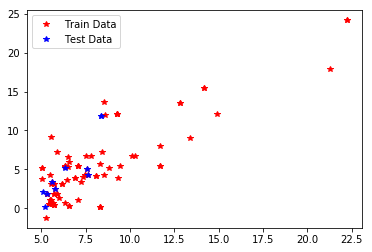

In [102]:
#Splitting the data into test and train data,in this case 90% is taken for training and 10% for testing.
test_perc=0.1
x_train,y_train,x_test,y_test = split_data(x,y,test_perc)
#Plotting the graph x_train,y_train,x_test,y_test
plt.figure(2)
plt.plot(x_train,y_train,'r*',label='Train Data')
plt.plot(x_test,y_test,'b*',label='Test Data')
plt.legend()
plt.show()

## Adding x0 bias in Dataset

In [103]:
(r,c)=np.shape(x_train)
x0=np.ones((1,r))
x_train=np.transpose(np.concatenate((x0,np.transpose(x_train))))  #Adding Bias in X_train
print(np.shape(x_train))

(87, 2)


In [104]:
r,c=np.shape(x_test)
x_test=np.transpose(np.concatenate((np.ones((1,r)),np.transpose(x_test))))  # Adding Bias in X_test

## Cost Function & Gradient Descent
Cost Function is a function that measures the performance of a Machine Learning model for given data. Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number.
<ul>
    <li>shape of x_train (m,2)</li>
    <li>shape of y_train (m,1)</li>
    <li>shape of theta (n,1)</li>
    <li>shape of error (n,1)</li>
    <li>shape of h (m,1)</li>
 </ul>

In [105]:
#Initialize variables
r,c=np.shape(x_train)
theta=np.zeros((c,1))
alpha=0.01
num_iters=1500

In [106]:
#Error between the hypothesis and actual y value.
def costfunction(x_train,y_train,theta):
    m=len(x_train)
    j=0
    h=np.matmul(x_train,theta)
    j=np.sum(((h-y_train)**2),axis=0)       
    return j/(2*m)


In [107]:
j1 = costfunction(x_train,y_train,theta)
print("Cost value is", j1)

Cost value is [27.29668039]


In [108]:
#Gradient descent is used to calculate, the right values of theta by reducing the cost function.
def gradientDescent(x_train,y_train,theta,alpha,num_iters):
    l=0
    J_history = []
    while l<num_iters:
        err=np.zeros((c,1))
        h=np.matmul(x_train,theta)
        err=np.sum(((h-y_train)*(x_train)),axis=0)
        err=np.transpose([err])
        cost=costfunction(x_train,y_train,theta)
        J_history.append(cost)
        theta=theta-alpha*(1/r)*err
        l=l+1
    return theta,J_history
    

In [109]:
thetas,J_history=gradientDescent(x_train,y_train,theta,alpha,num_iters)
print("Theta values are",thetas)

Theta values are [[-3.85243645]
 [ 1.16496768]]


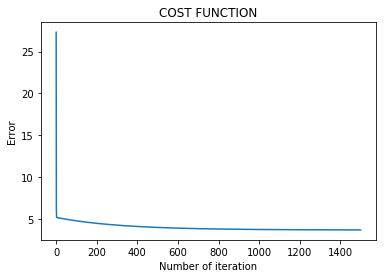

In [110]:
#Cost Function graph
plt.figure(3)
plt.plot(J_history)
plt.title("COST FUNCTION")
plt.xlabel('Number of iteration')
plt.ylabel('Error')
plt.show()

## Predicting Y

In [111]:
#Predicting y using the values of thetas obtained from gradient descent.
yhat=np.matmul(x_train,thetas)
train_err=np.sum(np.abs(((y_train/max(y_train))-(yhat/max(yhat)))/len(yhat)))
accuracy=(1-train_err)*100
print("Training Error:{},\nAccuracy:{}".format(train_err,accuracy))

Training Error:0.09232995996774862,
Accuracy:90.76700400322514


In [112]:
#Predicting y for the new set of data that hasn't been used to train the algorithm.
yhat_test=np.matmul(x_test,thetas)
test_err=np.sum(np.abs(((y_test/max(y_test))-(yhat_test/max(yhat_test)))/len(yhat_test)))
print("Testing Error:{}".format(test_err))

Testing Error:0.22985082332259127


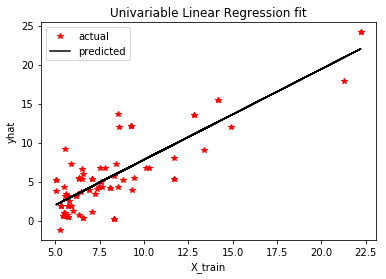

In [113]:
#Linear Regression fit
plt.figure(4)
plt.plot(x_train[:,1],y_train,'*r',label='x_train')
plt.plot(x_train[:,1],yhat,'-k',label='yhat')
plt.title('Univariable Linear Regression fit')
plt.xlabel('X_train')
plt.ylabel('yhat')
plt.gca().legend(('actual','predicted'))
plt.show()